In [1]:
import os
import csv
from pathlib import Path

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [3]:
#file input and output
output = "result.txt"
data = pd.read_csv("data_intern_challenge.csv", encoding = "utf-8")
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [7]:
#Table of AOV of each shop
data['aov'] = data['order_amount'] / data['total_items']
data['aov'].max()

25725.0

**Question 1a**

Firstly, let's visualize the data to know which factors causing the wrong calculation. 

In [8]:
x = data.groupby('order_id')['order_amount'].agg(['sum'])
x = x.reset_index()
x

,order_id,sum
0,1,224
1,2,90
2,3,144
3,4,156
4,5,156
...,...,...
4995,4996,330
4996,4997,234
4997,4998,351
4998,4999,354


Text(0.5, 0, 'Orders')

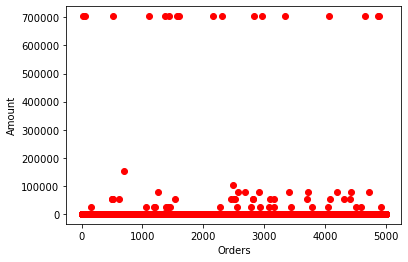

In [9]:
pl.plot(x['order_id'], x['sum'],'ro')
pl.ylabel('Amount')
pl.xlabel('Orders')

(50.0, 500.0)

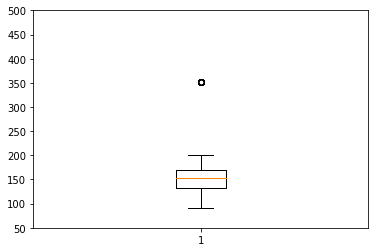

In [10]:
#Visualize AOV of each shop
pl.boxplot(data['aov'])
pl.ylim([50, 500])

In [11]:
#Look clearly into 5-number summary of AOV of shops
quartiles = np.percentile(data['aov'], [25, 50, 75])
data_min, data_max = data['aov'].min(), data['aov'].max()
print('Min:',data_min)
print('Q1:',quartiles[0])
print('Median:',quartiles[1])
print('Q3:',quartiles[2])
print('Max:',data_max)

Min: 90.0
Q1: 133.0
Median: 153.0
Q3: 169.0
Max: 25725.0


The Q3 is just 169, while the maximum AOV is 25725. So there may be something wrong with the maximum. The maximum AOV may be an outlier of the dataset.

In [12]:
# Find out the outlier
outlier = data.loc[data['aov'] == data_max]
outlier

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,aov
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


The outlier is the shop with the ID 78

In [13]:
removed_outliers = data[data.aov != data_max]

To not disrupt an analysis, I will get rid of an outlier in the calculation

In [14]:
# Calculate the average
removed_outliers['aov'].mean()

152.47557529269278

In [15]:
# Calculate the median
removed_outliers['aov'].median()

153.0

In [16]:
# Calculate the mode without getting rid of an outlier
data['aov'].mode()

0    153.0
dtype: float64

**Question 1b**


For the dataset, mode value will be reported as it reduces the effect of outliers. Therefore, it gives a more accurate description.


**Question 1c**


Its value is 153